In [12]:
from bokeh.plotting import figure, output_file, show
import pandas as pd
import matplotlib.pyplot as plt
import boto3
from sagemaker import get_execution_role
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.colors as colors

role = get_execution_role()
bucket= 'thes3'
data_key= 'Metro_ZORI_AllHomesPlusMultifamily_SSA.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
data = pd.read_csv(data_location)
data.head()
#prepare some data
#rentals = pd.read_csv(r"C:\Users\elise\Documents\ITCS 3190 Final Project\Metro_ZORI_AllHomesPlusMultifamily_SSA.csv")

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
0,102001,United States,0,1347.0,1352,1358.0,1364,1369,1375,1380,...,1727,1744,1761,1777,1795.0,1813,1830,1849,1867.0,1886.0
1,394913,"New York, NY",1,2356.0,2366,2376.0,2387,2397,2408,2418,...,2592,2608,2624,2640,2658.0,2676,2694,2715,2736.0,2757.0
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,1719.0,1730,1740.0,1750,1761,1771,1782,...,2347,2366,2384,2402,2421.0,2440,2459,2480,2500.0,2521.0
3,394463,"Chicago, IL",3,1374.0,1378,1381.0,1385,1388,1392,1395,...,1583,1591,1599,1607,1615.0,1624,1633,1642,1652.0,1661.0
4,394514,"Dallas-Fort Worth, TX",4,1125.0,1129,1132.0,1136,1139,1143,1147,...,1480,1498,1516,1534,1552.0,1571,1589,1608,1628.0,1647.0


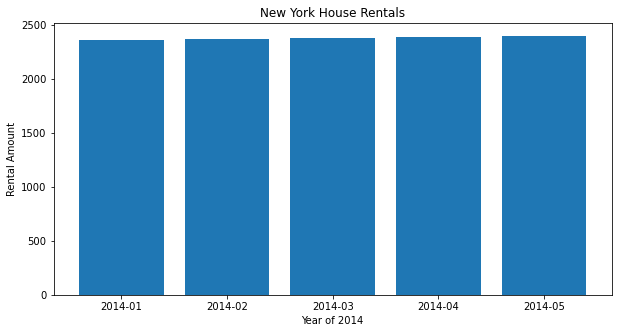

In [13]:
#data transformation #1
df = pd.DataFrame(columns=['Date','RegionID','RegionName','Amount'], index=['0','1','2','3','4'])
df.head()
x = ["2014-01", "2014-02", "2014-03", "2014-04", "2014-05"] 
df.Date[0] = "2014-01"
df.Date[1] = "2014-02"
df.Date[2] = "2014-03"
df.Date[3] = "2014-04"
df.Date[4] = "2014-05"

df.RegionID[0] = 394913
df.RegionID[1] = 394913
df.RegionID[2] = 394913
df.RegionID[3] = 394913
df.RegionID[4] = 394913

df.RegionName[0] = "New York, NY"
df.RegionName[1] = "New York, NY"
df.RegionName[2] = "New York, NY"
df.RegionName[3] = "New York, NY"
df.RegionName[4] = "New York, NY"

df.Amount[0] = 2356.0
df.Amount[1] = 2366
df.Amount[2] = 2376.0
df.Amount[3] = 2387
df.Amount[4] = 2397



df.head()
tf = pd.DataFrame(df)
 
Year = df['Date'].head(5)
Amount = df['Amount'].head(5)
 
# Figure Size
fig = plt.figure(figsize =(10, 5))
 
# Horizontal Bar Plot
plt.bar(Year[0:5], Amount[0:5])
plt.xlabel('Year of 2014')
plt.ylabel('Rental Amount')
plt.title("New York House Rentals")
plt.show()

       months       sum
0     january  113967.0
1    february  119138.0
2       march  118828.0
3       april  120094.0
4         may  120580.0
5        june  121071.0
6        july  121548.0
7      august  122026.0
8   september  122513.0
9     october  122986.0
10   november  123484.0
11   december  123967.0


<AxesSubplot:title={'center':'Total House Rent for Each Month of 2014'}, xlabel='months', ylabel='sum'>

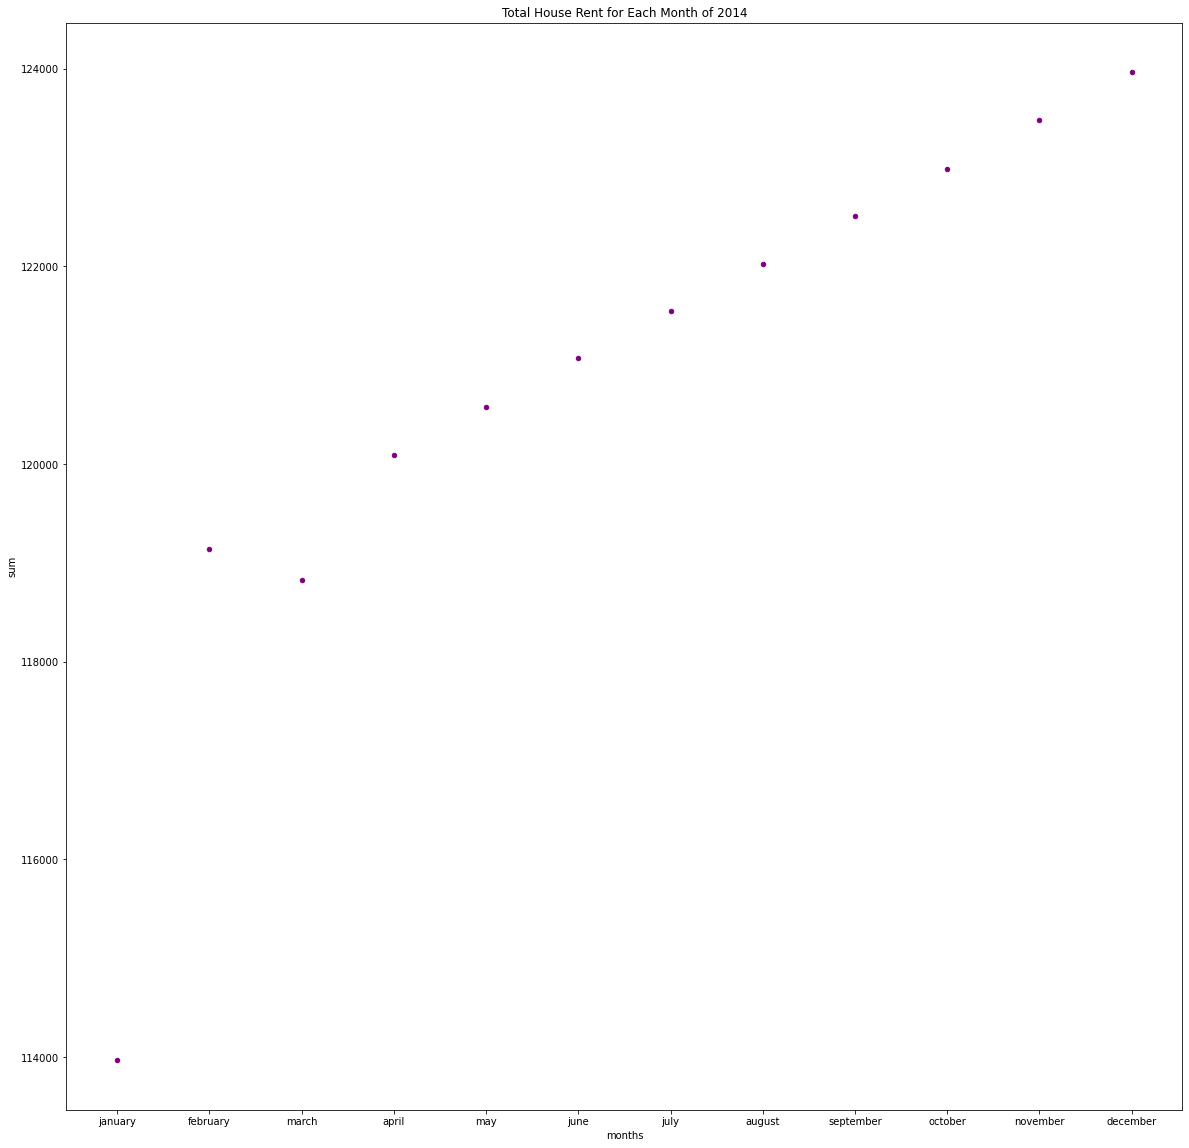

In [16]:
#data transformation 5 - find the yearly home rentals for all regions in general from 2014 to 2017

#sum of 2014 amount

year_2014=pd.DataFrame(t_data, columns=['months','sum'])


jSum = data['2014-01'].sum()
fSum = data['2014-02'].sum()
mSum = data['2014-03'].sum()
apSum = data['2014-04'].sum()
maySum = data['2014-05'].sum()
junSum = data['2014-06'].sum()
julSum = data['2014-07'].sum()
agSum = data['2014-08'].sum()
sepSum = data['2014-09'].sum()
oSum = data['2014-10'].sum()
nSum = data['2014-11'].sum()
dSum = data['2014-12'].sum()

t_data = [['january',jSum],['february',fSum],['march',mSum],['april',apSum],['may',maySum],['june',junSum],
       ['july',julSum],['august',agSum],['september',sepSum],['october',oSum],['november',nSum],['december',dSum]]

total_sum = year_2014.sum(axis=1)




print(year_2014)

year_2014.plot.scatter(x='months', y= 'sum',color='purple', figsize=(20,20), title = "Total House Rent for Each Month of 2014")



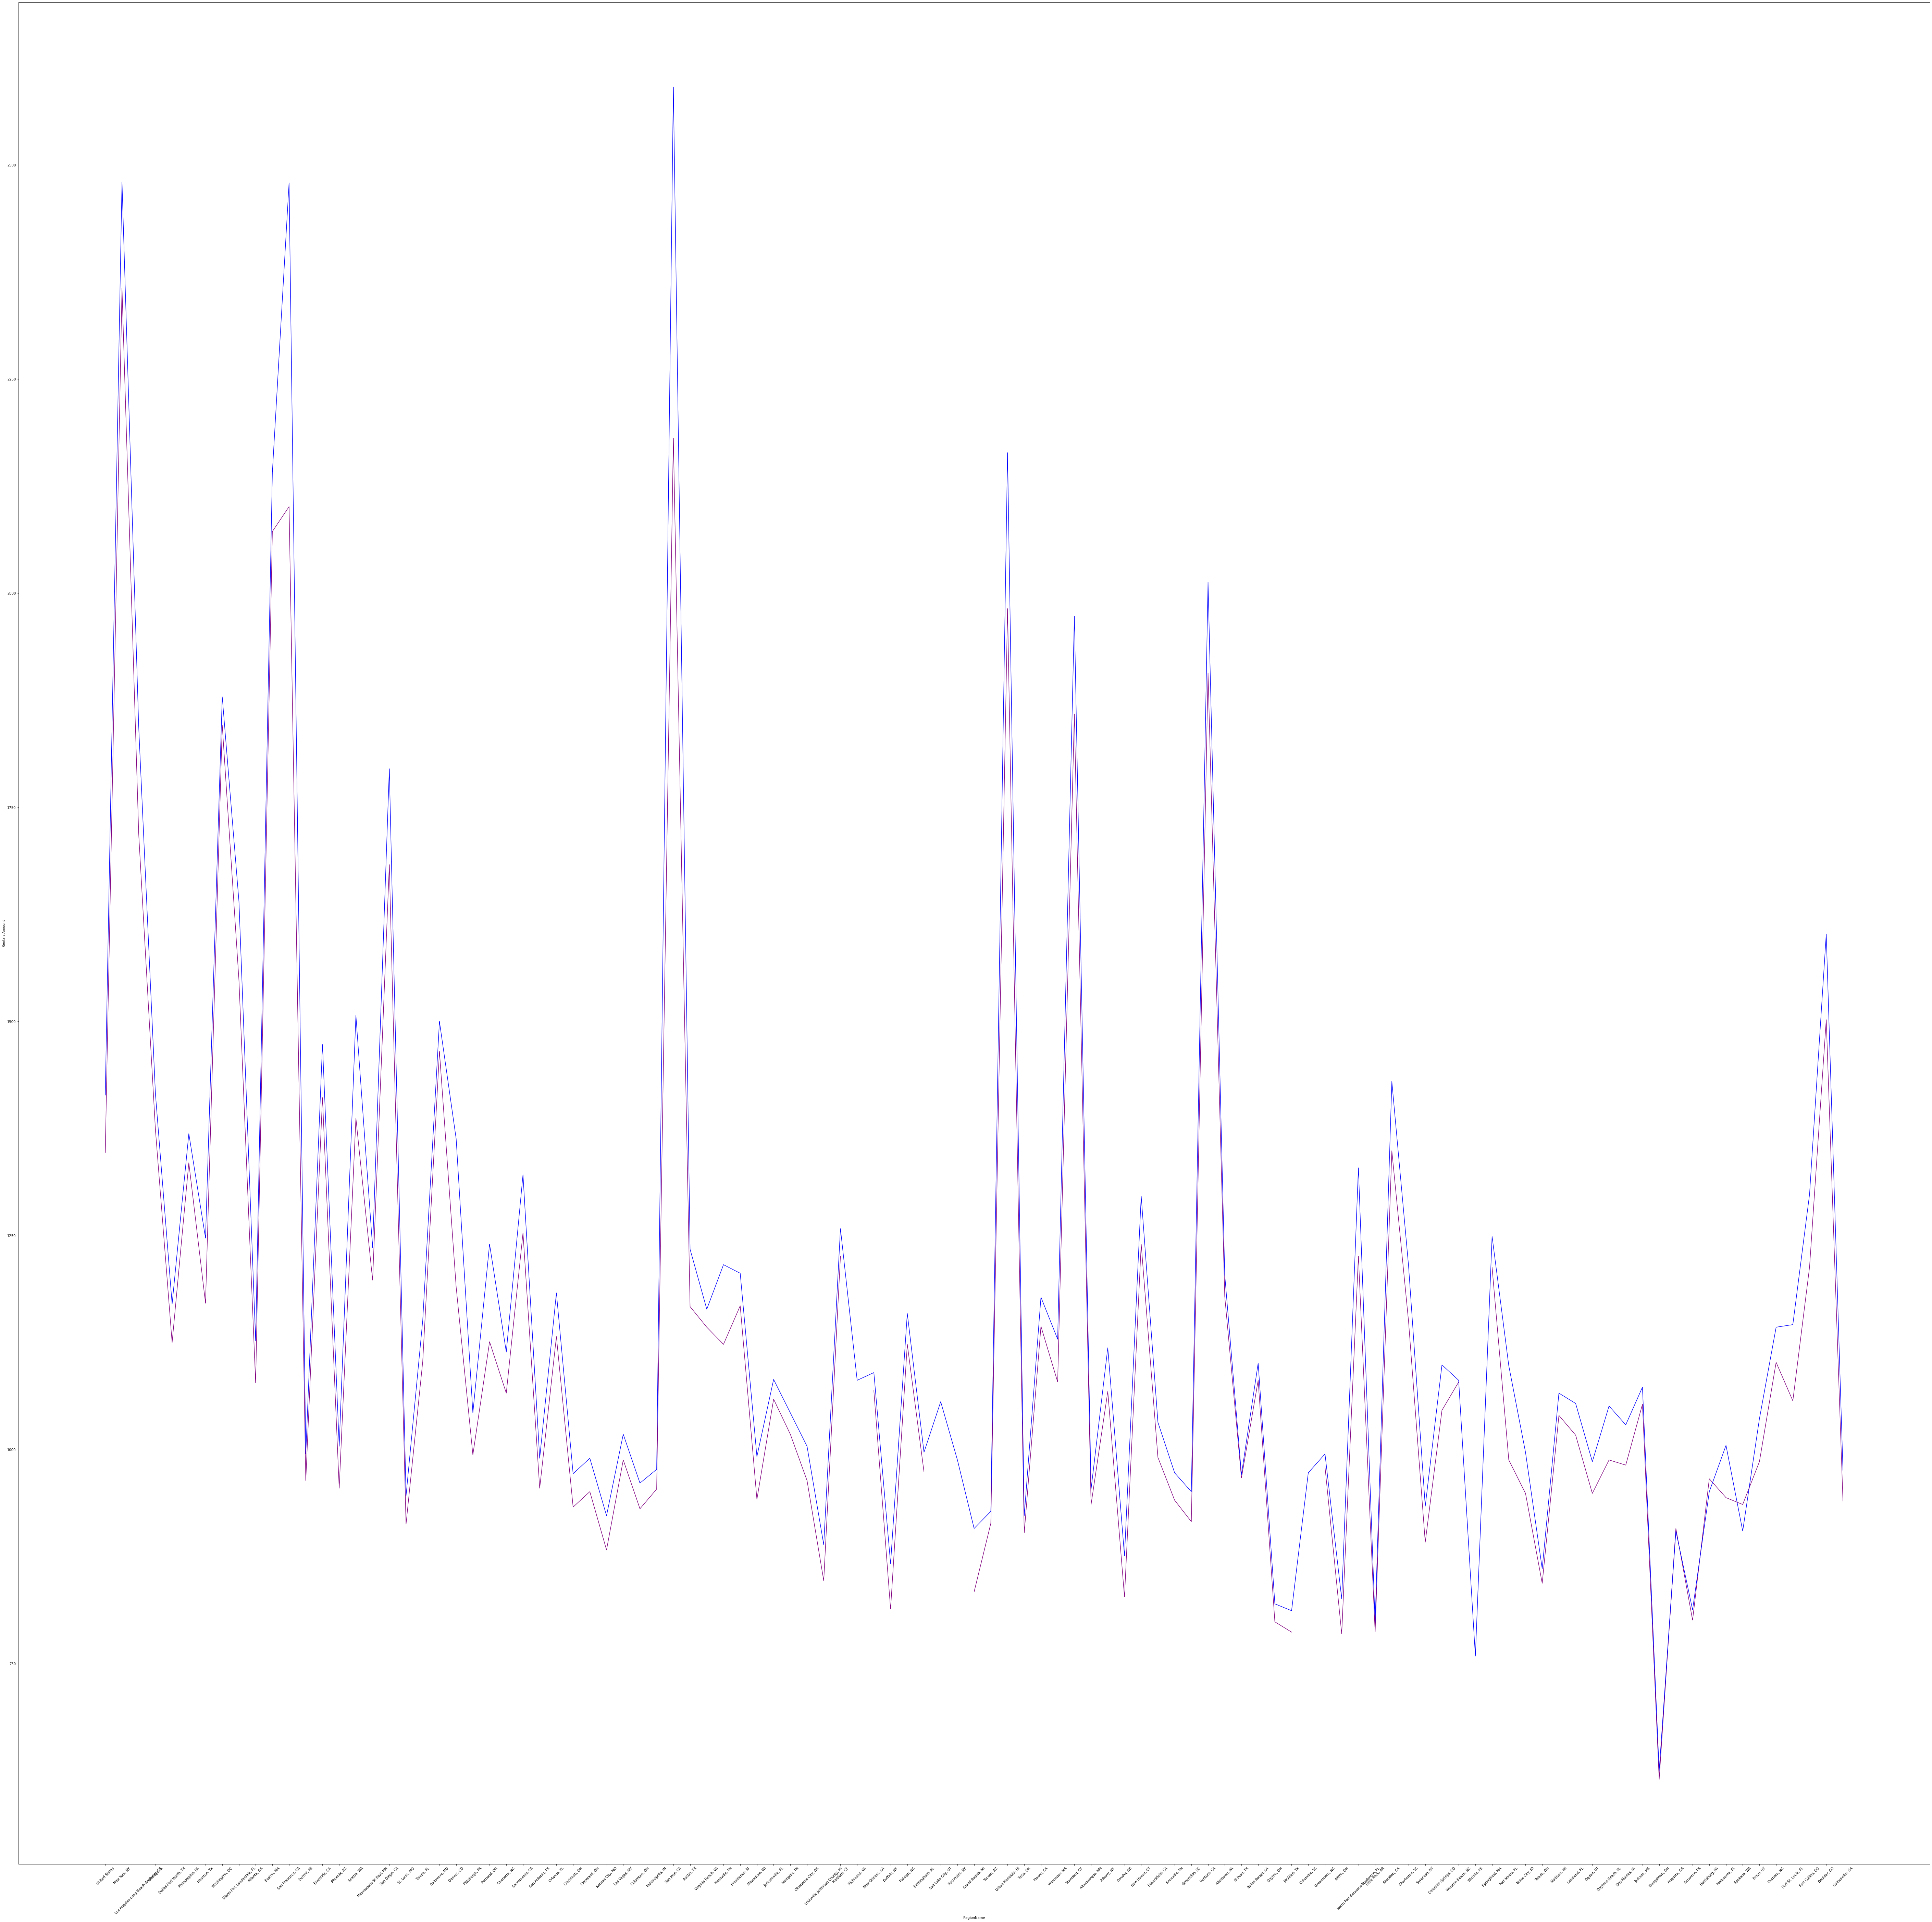

In [18]:
#dataframe is for 2014 rental homes- data transformation #2

rentals2014_df=pd.DataFrame(data,columns=['RegionName','2014-01','2014-02','2014-03','2014-04','2014-05','2014-06','2014-07','2014-08','2014-09','2014-10','2014-11','2014-12'])

rentals2014_df.rename(columns={('2014-01'): ('Jan 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-02'): ('Feb 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-03'): ('Mar 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-04'): ('Apr 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-05'): ('May 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-06'): ('Jun 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-07'): ('Jul 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-08'): ('Aug 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-09'): ('Sep 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-10'): ('Oct 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-11'): ('Nov 2014')}, inplace= True)
rentals2014_df.rename(columns={('2014-12'): ('Dec 2014')}, inplace= True)



rentals2014_df.head()


#dataframe is for 2015 rental homes- data transformation #3

rentals2015_df=pd.DataFrame(data,columns=['RegionName','2015-01','2015-02','2015-03','2015-04','2015-05','2015-06','2015-07','2015-08','2015-09','2015-10','2015-11','2015-12'])

rentals2015_df.rename(columns={('2015-01'): ('Jan 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-02'): ('Feb 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-03'): ('Mar 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-04'): ('Apr 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-05'): ('May 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-06'): ('Jun 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-07'): ('Jul 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-08'): ('Aug 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-09'): ('Sep 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-10'): ('Oct 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-11'): ('Nov 2015')}, inplace= True)
rentals2015_df.rename(columns={('2015-12'): ('Dec 2015')}, inplace= True)

#data transformation #4
fig = plt.figure(figsize=(100, 100))
plt.xlabel('RegionName')
plt.ylabel('Rentals Amount')
plt.xticks(rotation=45)
plt.plot(rentals2014_df["RegionName"], rentals2014_df['Jan 2014'], color='purple')
plt.plot(rentals2014_df["RegionName"], rentals2015_df['Jan 2015'], color='blue')


In [10]:
data.head(2)

,RegionID,RegionName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,...,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10
0,102001,United States,0,1347.0,1352,1358.0,1364,1369,1375,1380,...,1727,1744,1761,1777,1795.0,1813,1830,1849,1867.0,1886.0
1,394913,"New York, NY",1,2356.0,2366,2376.0,2387,2397,2408,2418,...,2592,2608,2624,2640,2658.0,2676,2694,2715,2736.0,2757.0


In [ ]:
#prepare some data
x = []
y = []

# output to static HTML file
output_file("lines.html")
# create a new plot with a title and axis labels
p = figure(title="simple line example 2", x_axis_label='x', y_axis_label='y')